### Problem 1
**a)**
We firstly work out the probability distribution of the orbital phase angle $\theta$(0-$2\pi$):
$$P(\theta) = \frac{1}{2 \pi}$$
and the inclination angle(the angle between the line of sight and the normal to the circular orbit)i(0-$\pi/2$):

The surface area of the unit sphere from inclination angle i to i+di is that
$dA = 2\pi \sin i di$
The probability distribution of i is the ratio of dA to half of the total surface area of unit sphere:
$P(i) = dA/2\pi = \sin i$

For potential of $\Phi = V^2 \ln(r)$
In epicyclic circle the gravtitational force is balanced with centrifugal force 
$a = -\frac{d\Phi}{d r}= -\frac{V^2}{r} = a_{c} = -\Omega^2 r = \frac{v^2}{r}$, 

therefore we get circular velocity $v=V$


From fig 1 in confuguration figure below we know that the velocity along line of sight(LOS) for arbitary circular orbit is 
$v_{LOS} = V\sin i \sin \theta$

We now calculate the probability distribution of LOS velocity using von-neumann's numerical method:

The generation of inclination angle is as follows:

We generate two random numbers i from 0 to $\pi$/2 and P from 0 to 1. We take the function P(i) as the form of probability distribution of the inclination angle $P(i) = \sin i$. If P<P(i), keep it. We run this for a large number of times and get a sample of i, then distribution of sample of i has the form of P(i).

We then generate $\theta$ from 0 to 2$\pi$ in uniform distribution. Assuming V = 200 km/s, we can calculate a sample of LOS velocity and plot the probability distribution for that. 

The implementation of code is shown below and we could see that the probability distribution of LOS velocity is uniform from -V to V.

In [4]:
from IPython.display import IFrame, display
#filepath = "http://wikipedia.org" # works with websites too!
filepath = 'configuration.pdf'
IFrame(filepath, width=700, height=400)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [2]:
N = 100000
n = 0
i_a = []
theta_a = []
while n<N:
    i = random.random()*np.pi/2
    P = random.random()
    if P<np.sin(i):
        i_a.append(i)
        theta_a.append(random.random()*2*np.pi)
        n += 1
i_a = np.array(i_a)
theta_a = np.array(theta_a)

v = 200
v_los = v*np.sin(i_a)*np.sin(theta_a)        

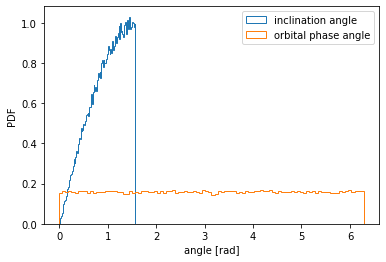

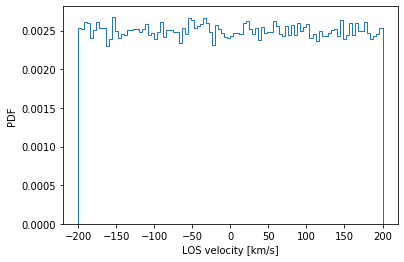

In [7]:
plt.figure(1)
plt.hist(i_a, 100, histtype='step', density=1,label = 'inclination angle')
plt.hist(theta_a, 100, histtype='step', density=1,label = 'orbital phase angle')
plt.xlabel('angle [rad]');plt.ylabel('PDF');plt.legend()

plt.figure(2)
plt.hist(v_los, 100, histtype='step', density=1)
plt.xlabel('LOS velocity [km/s]');plt.ylabel('PDF')
plt.show()

**b)** 

i) If we observe a sample of stars in galaxy with anisotropic velocity dispersion of this kind. The spectrum of induvidual star's redshift will be redshifted according to its LOS velocity. As LOS velocity distribute uniformly, the sum of these stars' spectrum (integrated spectrum) will give emission or absorption lines which peak constantly over a frequency range redshifted from the line's rest frame frequency due to LOS velocity from -V to +V. This properties of spectrum will give a test for this kind of anisotropy.   


ii) If the orbits in Q1a were all radial rather than circular, radial velocity will not be constant over time. For each value of velocity v, its LOS component, according to fig 2 above, is $v\cos i$ and has uniform distribution over -v to v based on the figure below.

The velocity distribution will be the sum of single velocity distribution, which will give non-uniform distribution which is peaked at the center since all single distribution covers the center and more single distributions contribute to values of PDF at low velocity.

No handles with labels found to put in legend.


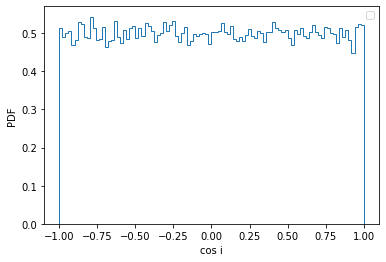

In [12]:
N = 100000
n = 0
i_a2 = []
while n<N:
    i = random.random()*np.pi
    P = random.random()
    if P<np.sin(i):
        i_a2.append(i)
        n += 1
i_a2 = np.array(i_a2)

plt.hist(np.cos(i_a2), 100, histtype='step', density=1)
plt.xlabel('cos i');plt.ylabel('PDF');plt.legend()
plt.show()

No handles with labels found to put in legend.


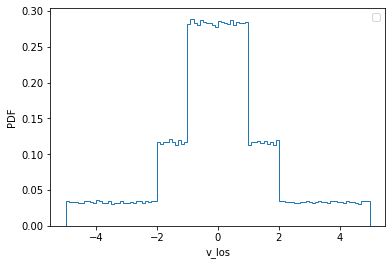

In [14]:
# an example plot showing the superposition effect.
v_los_ra = [];
v_los_ra.append(np.cos(i_a2))
v_los_ra.append(2*np.cos(i_a2))
v_los_ra.append(5*np.cos(i_a2))
v_los_ra = np.ravel(v_los_ra)
plt.hist(v_los_ra, 100, histtype='step', density=1)
plt.xlabel('v_los');plt.ylabel('PDF');plt.legend()
plt.show()

### Problem 2
Spherical Jeans equation reads:

$$
\frac{d}{d r}\left(\rho \sigma_{r r}^{2}\right)+\frac{\rho}{r}\left[2 \sigma_{r r}^{2}-\left(\sigma_{\theta \theta}^{2}+\sigma_{\phi \phi}^{2}+\overline{v_{\phi}}^{2}\right)\right]=-\rho \frac{d \Phi}{d r}
$$
where $\Phi \text { is the total potential }$, $\rho$ represent the volume dnesity distribution of the stars.

The mean rotation of the star is negligible says that $v_{\phi} = 0$

Also, isotropic velocity dispersion means:$$\sigma_{r r}^2 = \sigma_{\theta \theta}^2= \sigma_{\theta \theta}^2 = \sigma^{2}
$$
and isothermal velocity distribution means: $$
d \sigma^{2} / d r=0
$$

Hence we make the simplifications:

$$
\frac{d}{d r}\left(\rho \sigma_{r r}^{2}\right) = \sigma^2\frac{d\rho}{dr}
$$

$$
2 \sigma_{r r}^{2}-\left(\sigma_{\theta \theta}^{2}+\sigma_{\phi \phi}^{2}+\overline{v_{\phi}}^{2}\right) = 0
$$

Above simplifications modify the spherical Jeans equation to be:
$$
\sigma^2 \frac{d\rho}{dr} = -\rho \frac{d\Phi}{dr}$$

Since the gravitational field of the stars is negligible. The total gravitational potential is from uniform density distribution of dark matter halo. Therefore $-d\Phi/dr$ is the r component of the gravitational force exerted by the dark matter halo inside radius r:
$$-\frac{d\Phi}{dr} = \frac{F_{g,r}}{m} = -\frac{G M(<r)}{r^2} = -\frac{G}{r^2}\frac{4}{3}\pi r^3 \rho_0 = -\frac{4 \pi G \rho_0 r}{3}$$

Plug above equation into the simplified Jeans equations we get:
$$
\sigma^2 \frac{d\rho}{dr} = -\rho \frac{4 \pi G \rho_0 r}{3}
$$

$$\frac{d\rho}{\rho} = -\frac{4 \pi G \rho_0}{3 \sigma^2}r dr $$

By integral:
$$\ln\rho = -\frac{2 \pi G \rho_0}{3 \sigma^2}r^2 + \ln\rho_c$$

$$\rho = \rho_c \exp(-\frac{2 \pi G \rho_0}{3 \sigma} r^2) = \rho_c \exp(-\frac{r^2}{a^2}) $$
where $a = \sqrt{\frac{3 \sigma^2}{2\pi G \rho_0}}$ is the scale length of the galaxy and $\rho_c$ is the density at the center.

The surface density is the integral of the volume density along line of sight. As $r^2 = R^2 + z^2$, R is the radial distance and z is the coordinate along LOS, we know that: 
$$\Sigma(R) = \int_{-\infty}^{+\infty} \rho_c \exp(-\frac{R^2+z^2}{a^2}) dz
= \rho_c \exp(-\frac{R^2}{a^2}) \int_{-\infty}^{+\infty} \exp(-\frac{z^2}{a^2})dz
= a\rho_c \exp(-\frac{R^2}{a^2}) \int_{-\infty}^{+\infty} \exp(-x^2)dx = a\rho_c \sqrt{\pi} \exp(-\frac{R^2}{a^2})$$

, where I use change of variables $x = z/a$ in integration. 


comments:

The density distributions of the stars obeys Gaussian law, and it is expected for spherical dwarf galaxy according to this paper by Freeman https://iopscience.iop.org/article/10.3847/0004-637X/817/2/84